## Big Mart Sales Prediction

In [514]:
#collected 2013 sales data for 1559 products across 10 stores in different cities. 
#predict sale of particular product on particular store

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
%matplotlib inline
import scipy.stats as stat
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesRegressor
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV

#### Load Data Set

In [515]:
pd.pandas.set_option('display.max_columns',None)
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")


###### tain dataset

In [516]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###### test dataset

In [517]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


###### Dataset Description:
#Number of columns:12
#Number of rows: 8523
#Number of Independent Columns: 11
#Number of Dependent Column: 1

###### Checking the Dimensions of Dataset

###### train dataset

In [518]:
print(df_train.shape)

(8523, 12)


###### test dataset

In [519]:
print(df_test.shape)

(5681, 11)


###### summary of a train Dataset

In [520]:
print('Train Dataset:\n',df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Train Dataset:
 None


###### summary of a test Dataset

In [521]:
print('Test Dataset:\n',df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
Test Dataset:
 None


###### check for missing or null values per column in train dataset

In [522]:

print('\nTrain Dataset:\n',df_train.isnull().sum(axis=0))



Train Dataset:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


#train Dataset has three data types: float64, int64, object .
#Columns has no missing value except Item_Weight and Outlet_Size columns  has missing values.
#Item_Weight=1463 and Outlet_Size =2410 missing values.

###### check for missing or null values per column in test dataset

In [523]:
print('\nTest Dataset\n:',df_test.isnull().sum(axis=0))


Test Dataset
: Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


#testDataset has three data types: float64, int64, object .
#Columns has no missing value except Item_Weight and Outlet_Size columns  has missing values.
#Item_Weight=976 and Outlet_Size =1606 missing values.

###### Getting Each Attribute’s Data Type in train dataset

In [524]:
print('Train Dataset:\n',df_train.dtypes)

Train Dataset:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


#object Type : 7  (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type )
#float Type  : 4  (Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales )
#int Type    : 1  (Outlet_Establishment_Year)

###### Getting Each Attribute’s Data Type in test dataset

In [525]:
print('\nTest Dataset:\n',df_test.dtypes)


Test Dataset:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


#object Type : 7  (Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type )
#float Type  : 4  (Item_Weight,Item_Visibility,Item_MRP )
#int Type    : 1  (Outlet_Establishment_Year)

#### TO check which column Type

###### Target Variable(Categorical)     : Item_Outlet_Sales
#Predictors Variables (Continuous): All are Countinuous Except Item_Outlet_Sales,Item_MRP,
                                    Item_Visibility,Item_Weight,Item_Identifier

#train dataset

In [526]:
print('Train Dataset:\n',df_train.nunique())

Train Dataset:
 Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


#test Dataset

In [527]:
print('\nTest Dataset:\n',df_test.nunique())


Test Dataset:
 Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


###### Categorical and Countinuous Features in train Dataset

In [528]:
# Countinuous Features in Dataset
numfeat = [cname for cname in df_train.columns if df_train[cname].dtype != 'O']
print("Number of Continuous Features: {}".format(len(numfeat)))
print("Continuous Features: ",numfeat)

# Categorical features in Dataset
catfeat = [cname for cname in df_train.columns if df_train[cname].dtype == 'O']
print("\nNumber of Categorical Features: {}".format(len(catfeat)))
print("Categorical Features: ",catfeat)

Number of Continuous Features: 5
Continuous Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

Number of Categorical Features: 7
Categorical Features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


###### Categorical and Countinuous Features in test Dataset

In [529]:
# Countinuous Features in Dataset
numfeat = [cname for cname in df_test.columns if df_test[cname].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numfeat)))
print("Numerical Features: ",numfeat)

# Categorical features in Dataset
catfeat = [cname for cname in df_test.columns if df_test[cname].dtype == 'O']
print("\nNumber of Categorical Features: {}".format(len(catfeat)))
print("Categorical Features: ",catfeat)


Number of Numerical Features: 4
Numerical Features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

Number of Categorical Features: 7
Categorical Features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


###### Statistical Description of TRain Dataset

In [530]:
# Descriptive Continues features
df_train.describe(exclude=[object])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


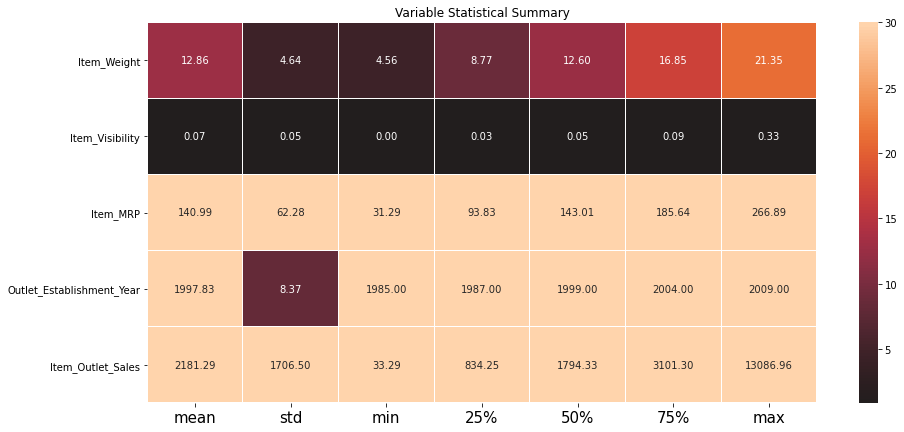

In [531]:
# Visualization of Statistical distribution of Data
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df_train.describe()[1:].transpose(),2),vmin=.9, vmax=30, center=0,annot=True,fmt='.2f', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

#Item_Visibility have min value=0 

In [533]:
# Descriptive Categorical features
df_train.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


###### Statistical Description of TRain Dataset

In [534]:
# Descriptive Continues features
df_test.describe(exclude=[object])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


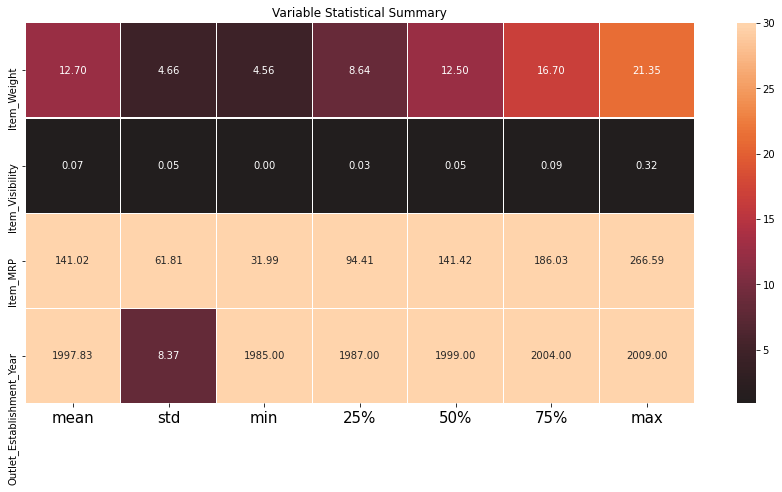

In [535]:
# Visualization of Statistical distribution of Data
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df_test.describe()[1:].transpose(),2),vmin=.9, vmax=30, center=0,annot=True,fmt='.2f', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

In [536]:
# Descriptive Categorical features
df_test.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,FDW10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


###### Visualization of Cardinality of All Features and Target in train Dataset

Text(0.5, 1.0, 'Cardinality')

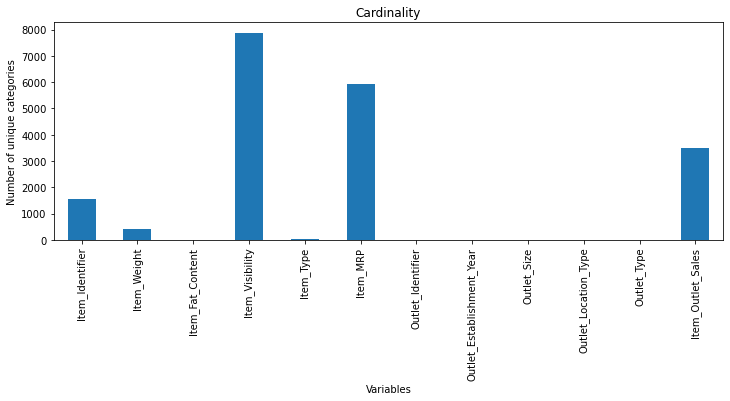

In [537]:
df_train.nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [538]:
#cardinality check for Countinuous features

#low cardinality Countinuous features:Outlet_Establishment_Year
#high cardinality Countinuous features:Item_Weight,Item_Visibility,Item_MRP
#high cardinality Target: Item_Outlet_Sale

for i in numfeat:
    uval = len(df_train[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Item_Weight are     : 416
Cardinality of Item_Visibility are     : 7880
Cardinality of Item_MRP are     : 5938
Cardinality of Outlet_Establishment_Year are     : 9


In [539]:
#cardinality check for Categorical features:
#low cardinality Categorical features:Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
#high cardinality Categorical features:Item_identifier 

for i in catfeat:
    uval = len(df_train[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Item_Identifier are     : 1559
Cardinality of Item_Fat_Content are     : 5
Cardinality of Item_Type are     : 16
Cardinality of Outlet_Identifier are     : 10
Cardinality of Outlet_Size are     : 4
Cardinality of Outlet_Location_Type are     : 3
Cardinality of Outlet_Type are     : 4


###### Visualization of Cardinality of All Features and Target in train Dataset

Text(0.5, 1.0, 'Cardinality')

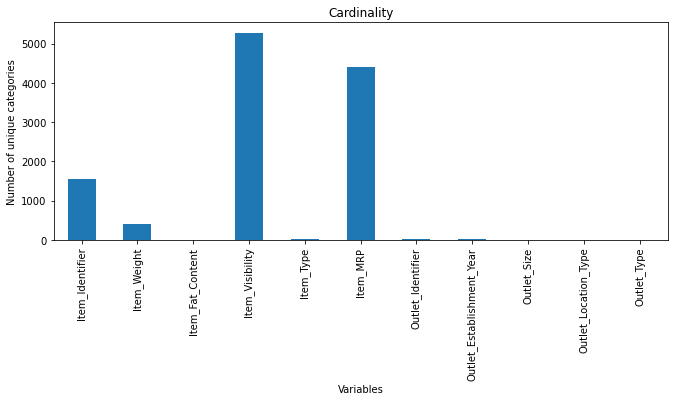

In [540]:
# Visualization of Cardinality of All Features and Target in Dataset
df_test.nunique().plot.bar(figsize=(11,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [541]:
#cardinality check for Countinuous features

#low cardinality Countinuous features:Outlet_Establishment_Year
#high cardinality Countinuous features:Item_Weight,Item_Visibility,Item_MRP
#high cardinality Target: Item_Outlet_Sale

for i in numfeat:
    uval = len(df_test[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Item_Weight are     : 411
Cardinality of Item_Visibility are     : 5277
Cardinality of Item_MRP are     : 4402
Cardinality of Outlet_Establishment_Year are     : 9


In [542]:
#cardinality check for Categorical features:
#low cardinality Categorical features:Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
#high cardinality Categorical features:Item_identifier 

for i in catfeat:
    uval = len(df_test[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Item_Identifier are     : 1543
Cardinality of Item_Fat_Content are     : 5
Cardinality of Item_Type are     : 16
Cardinality of Outlet_Identifier are     : 10
Cardinality of Outlet_Size are     : 4
Cardinality of Outlet_Location_Type are     : 3
Cardinality of Outlet_Type are     : 4


###### check for duplicate rows

In [543]:
# check for duplicate rows in train dataset
sum(df_train.duplicated())

0

In [544]:
# check for duplicate rows in test dataset
sum(df_test.duplicated())

0

#### HAndling MIssing values

###### Handling Missing values in Categorical and continuous Features in train dataset

In [545]:
#Handling Missing values in Categorical Features:
print('Missing values in Categorical Features:')  
print(df_train[catfeat].isnull().sum(axis=0))
#df[catfeat].isnull().sum(axis=0).plot(kind='barh')

# In Outlet_Size categorical features filling missing values by mode
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_train[catfeat].isnull().sum(axis=0)

Missing values in Categorical Features:
Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64


Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

###### Handling Missing values in Categorical and continuous Features in train dataset

In [546]:
#Handling Missing values in Categorical Features:
print('Missing values in Categorical Features:')  
print(df_test[catfeat].isnull().sum(axis=0))
#df[catfeat].isnull().sum(axis=0).plot(kind='barh')

# In Outlet_Size categorical features filling missing values by mode
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)
df_test[catfeat].isnull().sum(axis=0)

Missing values in Categorical Features:
Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64


Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [547]:
#high cardinality Countinuous features
# Feature Engineering of Item_Visibility,Item_MRP and Item_Outlet_Sales column to decrease high cardinality
df_train["Item_Visibility"]=df_train["Item_Visibility"].round(2)

df_train["Item_MRP"] = df_train["Item_MRP"].round(0)
df_train["Item_MRP"] = df_train["Item_MRP"].astype(float).astype(int)


df_train["Item_Outlet_Sales"]=df_train["Item_Outlet_Sales"].round(0)
df_train["Item_Outlet_Sales"] = df_train["Item_Outlet_Sales"].astype(float).astype(int)

In [548]:
#high cardinality Countinuous features
# Feature Engineering of Item_Visibility,Item_MRP and Item_Outlet_Sales column to decrease high cardinality
df_test["Item_Visibility"]=df_test["Item_Visibility"].round(2)

df_test["Item_MRP"] = df_test["Item_MRP"].round(0)
df_test["Item_MRP"] = df_test["Item_MRP"].astype(float).astype(int)


###### Encoding 

#train dataset

In [549]:
# Encoding Categorical feature
print('\nTrain Dataset:\n')
#Item_Fat_Content replace value
df_train['Item_Fat_Content'].replace({'LF':0, 'Low Fat': 0,'low fat': 0,'Regular': 1,'reg':1}, inplace = True)
print(df_train['Item_Fat_Content'].unique())

#Outlet_Size replace value
df_train['Outlet_Size'].replace({'High':2, 'Medium': 1,'Small': 0}, inplace = True)
print(df_train['Outlet_Size'].unique())

#Outlet_Location_Type replace value
df_train['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2': 1,'Tier 3': 2}, inplace = True)
print(df_train['Outlet_Location_Type'].unique())

#Outlet_Type replace value
df_train['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3}, inplace = True)
print(df_train['Outlet_Type'].unique())

#Outlet_Identifier,Item_Type and Item_Identifier Encoding
df_train[["Outlet_Identifier"]]=df_train[["Outlet_Identifier"]].apply(LabelEncoder().fit_transform)
df_train[["Item_Type"]]=df_train[["Item_Type"]].apply(LabelEncoder().fit_transform)
df_train[["Item_Identifier"]]=df_train[["Item_Identifier"]].apply(LabelEncoder().fit_transform)




Train Dataset:

[0 1]
[1 2 0]
[0 2 1]
[1 2 0 3]


#test dataset

In [550]:

# Encoding Categorical feature
print('\nTest Dataset:\n')
#Item_Fat_Content replace value
df_test['Item_Fat_Content'].replace({'LF':0, 'Low Fat': 0,'low fat': 0,'Regular': 1,'reg':1}, inplace = True)
print(df_test['Item_Fat_Content'].unique())

#Outlet_Size replace value
df_test['Outlet_Size'].replace({'High':2, 'Medium': 1,'Small': 0}, inplace = True)
print(df_test['Outlet_Size'].unique())

#Outlet_Location_Type replace value
df_test['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2': 1,'Tier 3': 2}, inplace = True)
print(df_test['Outlet_Location_Type'].unique())

#Outlet_Type replace value
df_test['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3}, inplace = True)
print(df_test['Outlet_Type'].unique())

#Outlet_Identifier,Item_Type and Item_Identifier Encoding
df_test[["Outlet_Identifier"]]=df_test[["Outlet_Identifier"]].apply(LabelEncoder().fit_transform)
df_test[["Item_Type"]]=df_test[["Item_Type"]].apply(LabelEncoder().fit_transform)
df_test[["Item_Identifier"]]=df_test[["Item_Identifier"]].apply(LabelEncoder().fit_transform)






Test Dataset:

[0 1]
[1 0 2]
[0 1 2]
[1 0 3 2]


##### check for Outliers

###### check for Outliers in train dataset

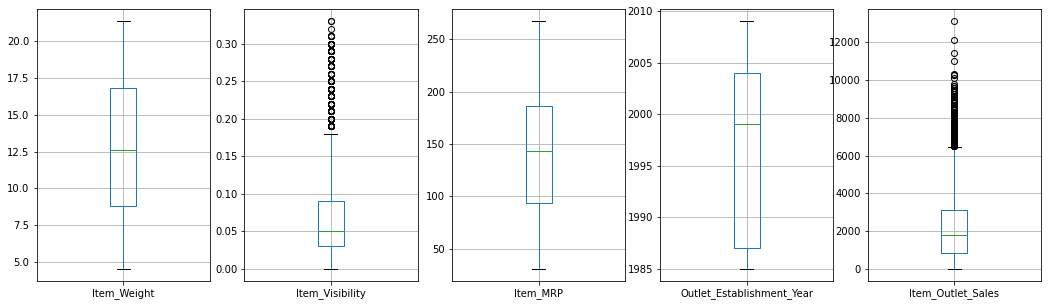

In [551]:
# check for Outliers for Continuous features
colslst1=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df_train.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

#there is outlier in Item_visibility and Item_Outlet_Sales

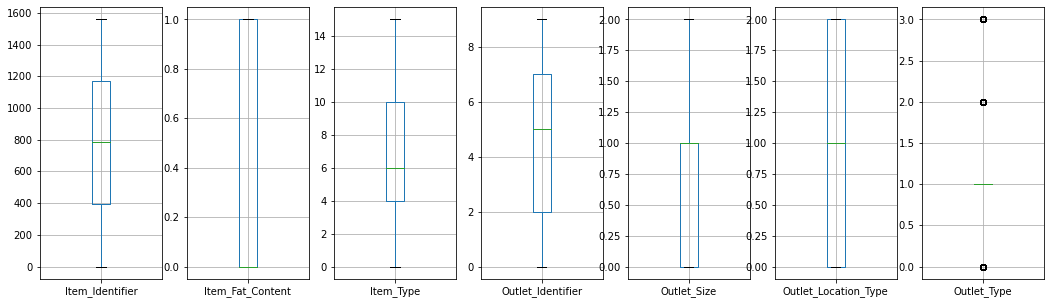

In [552]:
# check for Outliers for Categorical features
colslst1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
     df_train.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

###### check for Outliers in test dataset

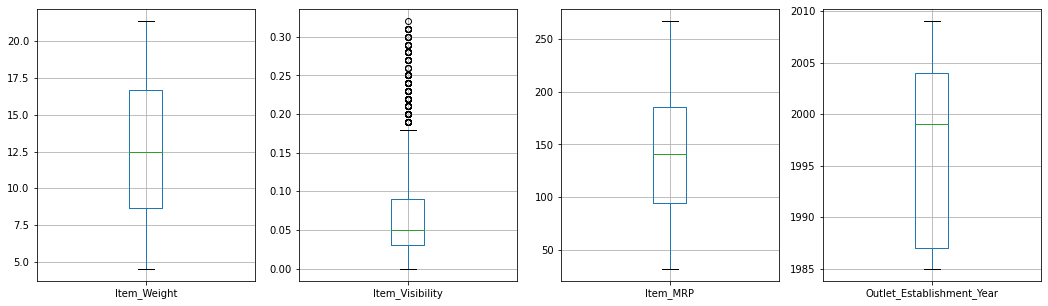

In [553]:
# check for Outliers for Continuous features
colslst1=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df_test.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

#there is outlier in Item_visibility and Item_Outlet_Sales

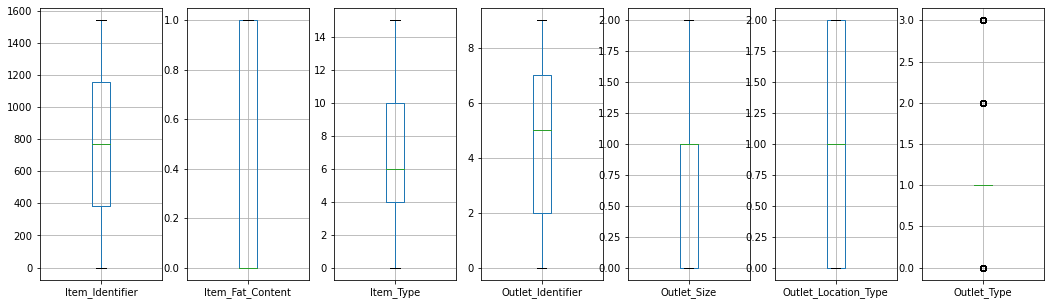

In [554]:
# check for Outliers for Categorical features
colslst1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
     df_test.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

#living Outlet_type as it is.

###### removing outliers

#removing outliers from train dataset

In [555]:

fout = ['Item_Visibility','Item_Outlet_Sales']
for f in fout:
    q1 = df_train[f].quantile(0.25)
    q3 = df_train[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df_train.loc[df_train[f]<lolimit,f] = lolimit
    df_train.loc[df_train[f]>uplimit,f] = uplimit


#removing outliers from test dataset

In [556]:
  
fout = ['Item_Visibility']
for f in fout:
    q1 = df_test[f].quantile(0.25)
    q3 = df_test[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df_test.loc[df_test[f]<lolimit,f] = lolimit
    df_test.loc[df_test[f]>uplimit,f] = uplimit

###### Handling Missing values

In [557]:
#train dataset

In [558]:
#Handling Missing values in Countinuous Features:
print('\nTrain Dataset:\n',df_train[numfeat].isnull().sum(axis=0))
#df[numfeat].isnull().sum(axis=0).plot(kind='barh')

# In Item_Weight Continues features filling missing values by mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_train[numfeat].isnull().sum(axis=0)

# In Item_Visibility Continues features filling zero values by mean
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace([0],df_train['Item_Visibility'].mean())
(df_train['Item_Visibility']==0).value_counts() 




Train Dataset:
 Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64


False    8523
Name: Item_Visibility, dtype: int64

In [559]:
#test Dataset

In [560]:
#Handling Missing values in Countinuous Features:
print('\nTest Dataset:\n',df_test[numfeat].isnull().sum(axis=0))
#df[numfeat].isnull().sum(axis=0).plot(kind='barh')

# In Item_Weight Continues features filling missing values by mean
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)
df_test[numfeat].isnull().sum(axis=0)

# In Item_Visibility Continues features filling zero values by mean
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace([0],df_test['Item_Visibility'].mean())
(df_test['Item_Visibility']==0).value_counts() 


Test Dataset:
 Item_Weight                  976
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64


False    5681
Name: Item_Visibility, dtype: int64

###### reducing Cardiniality

In [561]:
#high cardinality Countinuous features in train dataset
# Feature Engineering of Item_Weight column to decrease high cardinality
df_train["Item_Weight"] = df_train["Item_Weight"].round(0)
df_train["Item_Weight"] = df_train["Item_Weight"].astype(float).astype(int)


#high cardinality Countinuous features in test dataset
# Feature Engineering of Item_Weight column to decrease high cardinality
df_test["Item_Weight"] = df_test["Item_Weight"].round(0)
df_test["Item_Weight"] = df_test["Item_Weight"].astype(float).astype(int)

###### checking outlier after removing 

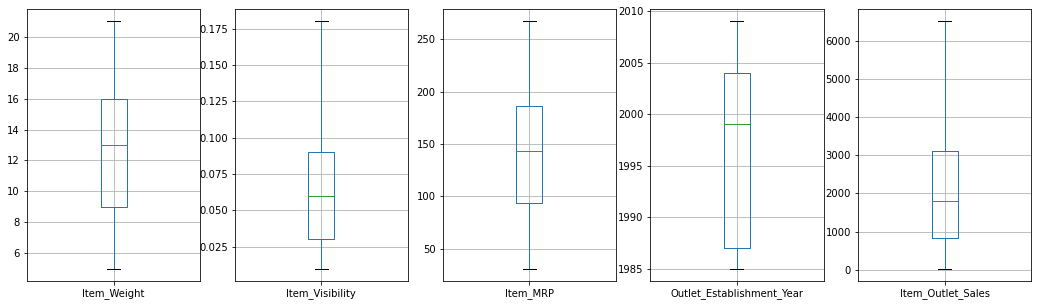

In [562]:
# check for Outliers After Removel in train dataset
colslst1=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df_train.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

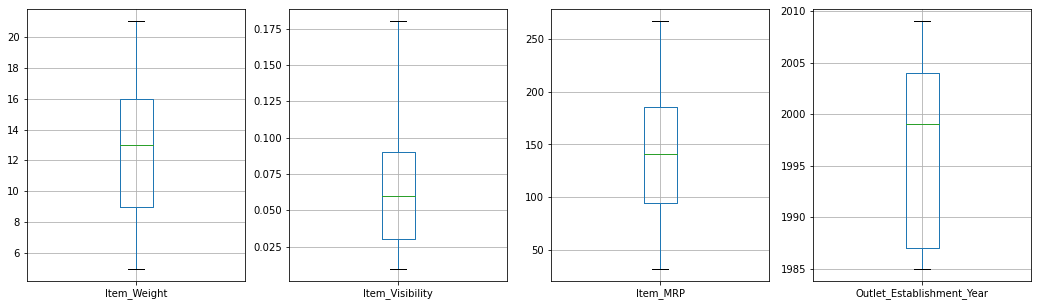

In [563]:
# check for Outliers After Removel in test dataset
colslst1=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df_test.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

###### Check for Skweness

In [564]:
#Check for Skweness in train dataset
print('Train Dataset Skewness:\n',df_train.skew())

Train Dataset Skewness:
 Item_Identifier             -0.008877
Item_Weight                  0.072802
Item_Fat_Content             0.616705
Item_Visibility              0.813162
Item_Type                    0.101655
Item_MRP                     0.127214
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            0.874437
dtype: float64


In [565]:
#Check for Skweness in test dataset
print('\nTest Dataset Skewness:\n',df_test.skew())


Test Dataset Skewness:
 Item_Identifier             -0.000020
Item_Weight                  0.100191
Item_Fat_Content             0.609223
Item_Visibility              0.837822
Item_Type                    0.096486
Item_MRP                     0.135900
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                  0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64


###### train dataset

###### #a) Exploring target variable:                                                        #Univariate Analysis:
#Shows Slightly Right skewed distribution 

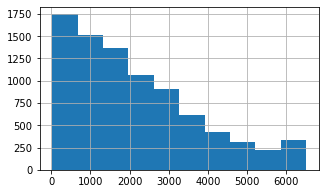

In [566]:
df_train['Item_Outlet_Sales'].hist(figsize=(5,3))
plt.show()

###### Creating Graph for--------- Continuous(Predictor) variable          # Univariate Plot 
#Shows Slightly Right skewed distribution in Item_Visibility

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>]],
      dtype=object)

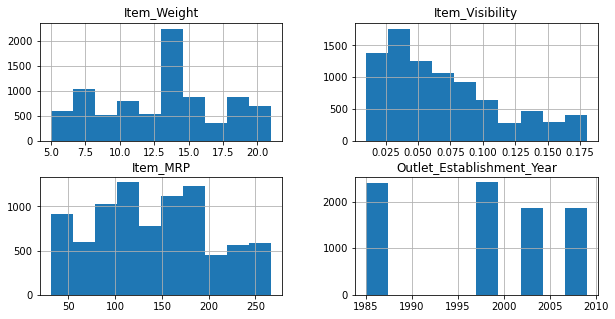

In [567]:
df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']].hist(figsize=(10,5))


###### Creating Graph for------------ Categorical(Predictor) variable          # Univariate Plot 

array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Type'}>],
       [<AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>],
       [<AxesSubplot:title={'center':'Outlet_Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

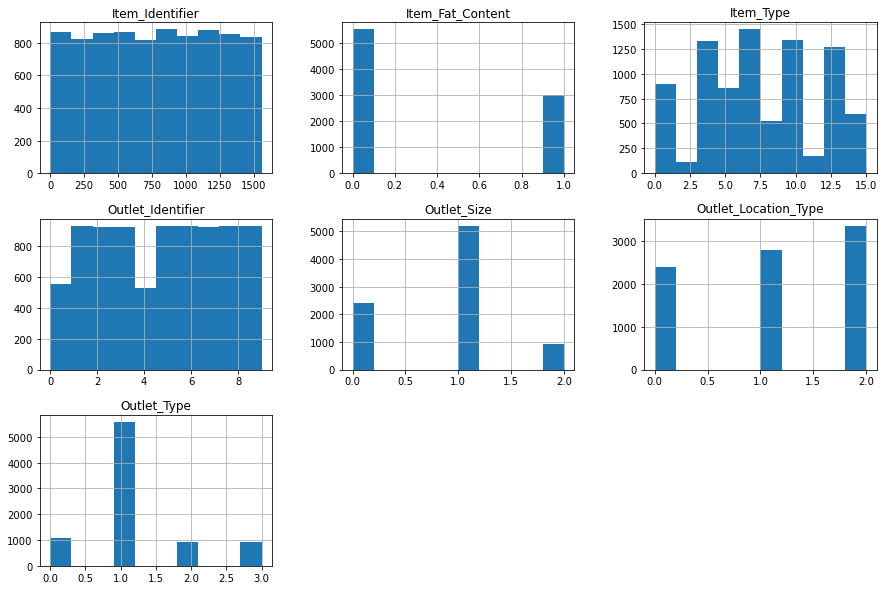

In [568]:
df_train[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']].hist(figsize=(15,10))

###### removing Skweness from columns Item_Visibility,Item_Outlet_Sales

<AxesSubplot:>

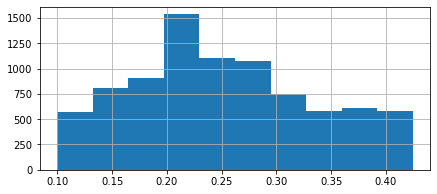

In [569]:
df_train['Item_Visibility']= np.sqrt(df_train['Item_Visibility'])
df_train['Item_Visibility'].hist(figsize=(7,3))

<AxesSubplot:>

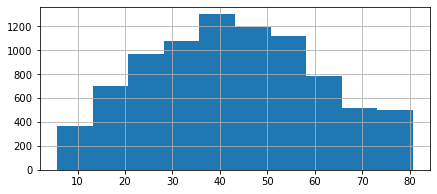

In [570]:
df_train['Item_Outlet_Sales']=np.sqrt(df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales'].hist(figsize=(7,3))
#df.head()

###### test Dataset
###### Creating Graph for------------ Categorical(Predictor) variable          # Univariate Plot 

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>],
       [<AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>, <AxesSubplot:>]],
      dtype=object)

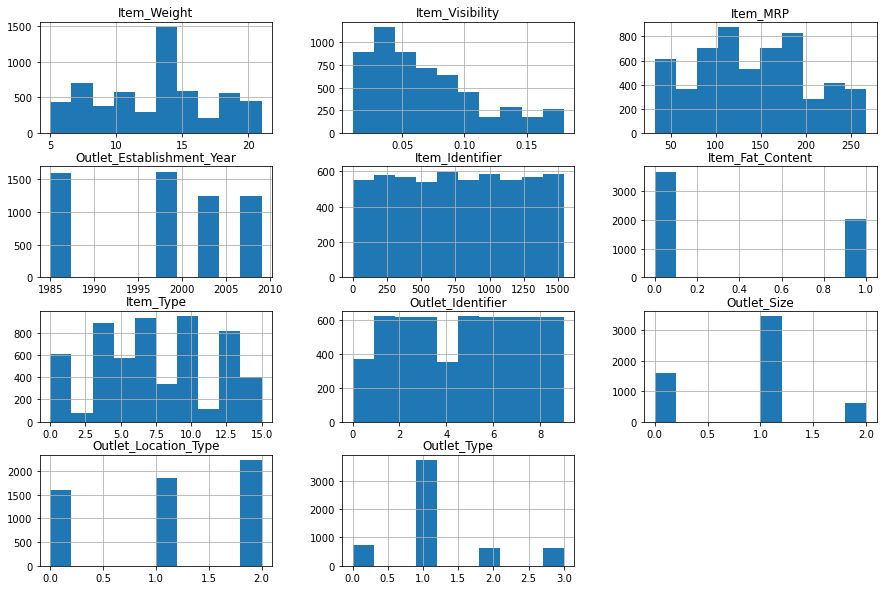

In [571]:
df_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']].hist(figsize=(15,10))

###### removing Skweness from columns Item_Visibility,Item_Outlet_Sales

<AxesSubplot:>

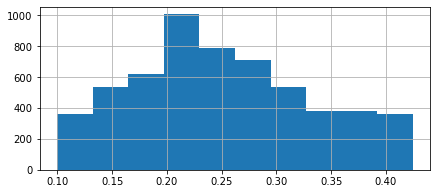

In [572]:
df_test['Item_Visibility']= np.sqrt(df_test['Item_Visibility'])
df_test['Item_Visibility'].hist(figsize=(7,3))

In [ ]:
#sns.pairplot(df_train, hue="Item_Outlet_Sales")

###### Anova Test 

In [446]:

from scipy.stats import f_oneway
cp=df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
sp=[]
for i in cp:
    cg=df_train.groupby('Item_Outlet_Sales')[i].apply(list)
    av=stat.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')

Item_Identifier ------correlated------: 6.906912820411217e-05 

Item_Weight ------correlated------: 0.0016922038125709135 

Item_Fat_Content ------correlated------: 1.0885209301724345e-05 

Item_Visibility ------correlated------: 3.0915804357863226e-10 

Item_Type ------correlated------: 2.4027943235470765e-06 

Item_MRP ------correlated------: 0.0 

Outlet_Identifier ------correlated------: 5.113431218498336e-17 

Outlet_Establishment_Year ------correlated------: 6.232267910744529e-12 

Outlet_Size ------correlated------: 0.1679974690014993 

Outlet_Location_Type ------correlated------: 0.07374168958871917 

Outlet_Type ------correlated------: 6.828827348119084e-143 

Item_Outlet_Sales ------correlated------: 0.0 



###### Multivariate Analysis: Check for Correlation Among Multiple Variables   in train dataset

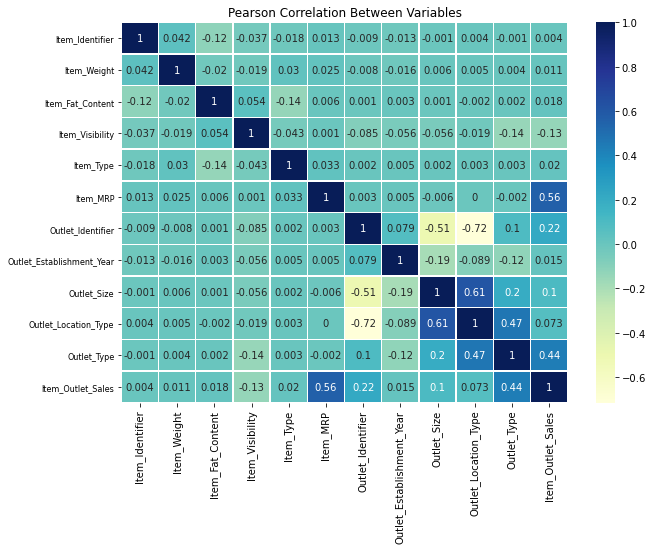

In [343]:
pcorrel = df_train.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### Multivariate Analysis: Check for Correlation Among Multiple Variables      in test dataset

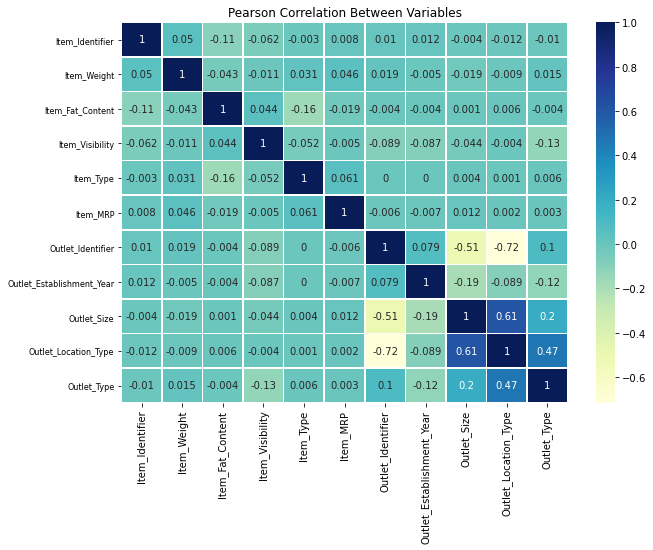

In [344]:
pcorrel = df_test.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### Reviewing Correlation between Attributes

In [345]:
# Check Strongly Related Features  in train dataset
cor = df_train.corr()
cor_target = abs(cor["Item_Outlet_Sales"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Item_MRP             0.563141
Outlet_Identifier    0.215772
Outlet_Type          0.442270
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64 

Weak Relates:

 Item_Identifier              0.003830
Item_Weight                  0.011221
Item_Fat_Content             0.017727
Item_Visibility              0.132701
Item_Type                    0.019539
Outlet_Establishment_Year    0.015099
Outlet_Size                  0.105278
Outlet_Location_Type         0.073426
Name: Item_Outlet_Sales, dtype: float64


###### join Test and TRain Dataset

In [204]:
#df_all = pd.concat([df_train[df_train.columns[:-1]], df_test])
#y = df_train['Item_Outlet_Sales']

ndf_train = df_train.iloc[:,:11]
y = df_train.iloc[:,-1]
df_all=pd.concat([ndf_train,df_test])
df_all.shape
y.shape

(8523,)

###### Splitting data into test and train dataset

In [346]:
df_train = df_all[:len(df_train)]
df_test = df_all[len(df_train):]

print(df_train.shape)
print(df_test.shape)


(8523, 11)
(5681, 11)


###### Splitting data into Independent Features and Dependent Features

In [347]:
print(y.shape)
print(df_train.shape)

(8523,)
(8523, 11)


###### Importance of Data Feature Selection

In [348]:
# Feature Selection Techniques
array = df_train.values
x = array[:,0:11]
y = array[:,8]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)

set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(x)
print ("\nFeatured data:\n", featured_data[0:4])

[8.70e+00 1.31e+00 6.98e-02 8.02e-01 9.67e-01 2.78e+01 4.06e+03 6.91e+01
 3.70e+03 1.92e+03 6.15e+02]

Featured data:
 [[9. 1. 0. 1.]
 [3. 1. 2. 2.]
 [9. 1. 0. 1.]
 [0. 1. 2. 0.]]


In [349]:
#Feature Importance
etr_model = ExtraTreesRegressor()
etr_model.fit(df_train,y)
etr_model.feature_importances_

#feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
#feature_imp.nlargest(10).plot(kind='barh')

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

###### removing less correlated feature

In [351]:
newdf_train=df_train.drop(["Item_Identifier","Item_Weight","Item_Fat_Content"],axis=1)
print(newdf_train.shape)
newdf_test=df_test.drop(["Item_Identifier","Item_Weight","Item_Fat_Content"],axis=1)
print(newdf_test.shape)

(8523, 8)
(5681, 8)


###### Splitting Data into training and testing set

In [352]:
x_train, x_test, y_train, y_test = train_test_split(newdf_train,y, test_size = 0.2, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6818, 8)
(6818,)
(1705, 8)
(1705,)


###### Normalization

In [353]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x_train,method='yeo-johnson')
print('x_train:\n',x_train)
x_test=power_transform(x_test,method='yeo-johnson')
print('\nx_test:\n',x_test)

x_train:
 [[-1.28  1.7   1.5  ...  0.32 -0.13 -0.11]
 [-1.85 -0.46 -0.59 ... -1.41 -0.13 -0.11]
 [-1.85 -0.46 -0.78 ... -1.41 -1.38 -0.11]
 ...
 [ 1.89  1.7   0.54 ...  0.32  1.09 -1.92]
 [-0.24 -0.22 -1.56 ...  0.32 -0.13 -0.11]
 [ 1.89  0.25 -1.25 ...  0.32  1.09 -1.92]]

x_test:
 [[ 0.24  1.69  1.75 ...  0.32  1.08  1.  ]
 [-0.88  0.68 -0.79 ...  1.91  1.08 -0.16]
 [ 1.94  0.25  1.27 ... -1.43 -1.35 -1.92]
 ...
 [ 1.83  0.47  0.6  ...  0.32  1.08  1.  ]
 [-0.88 -0.45 -0.38 ... -1.43 -1.35 -0.16]
 [ 1.44  1.69  0.54 ...  0.32 -1.35 -0.16]]


###### Sandardization of data

In [354]:
#sc = StandardScaler()
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)
print('x_train:\n',x_train)
x_test = sc.fit_transform(x_test)
print('\nx_test:\n',x_test)

x_train:
 [[0.15 1.   0.91 ... 0.53 0.5  0.47]
 [0.   0.4  0.37 ... 0.   0.5  0.47]
 [0.   0.4  0.32 ... 0.   0.   0.47]
 ...
 [1.   1.   0.66 ... 0.53 1.   0.  ]
 [0.43 0.47 0.11 ... 0.53 0.5  0.47]
 [1.   0.6  0.19 ... 0.53 1.   0.  ]]

x_test:
 [[0.55 1.   0.98 ... 0.52 1.   0.77]
 [0.26 0.72 0.31 ... 1.   1.   0.46]
 [1.   0.6  0.85 ... 0.   0.   0.  ]
 ...
 [0.97 0.66 0.68 ... 0.52 1.   0.77]
 [0.26 0.4  0.42 ... 0.   0.   0.46]
 [0.87 1.   0.66 ... 0.52 0.   0.46]]


### Model BUilding

#### MOdel Building using Linear Regression

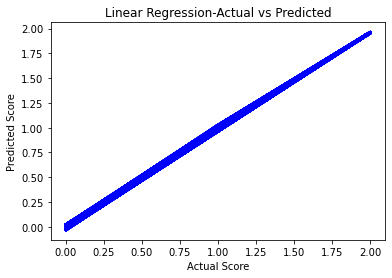


r2 Score On Train Data: 0.9985699282852628

r2 Score On Test Data: 0.9989029077273344


Mean Absolute Error: 0.015522391455622824

Mean Squared Error: 0.00038260679055742374

Root Mean Squared Error: 0.019560337179032057

Explained Variance Score: 0.9990531390477863

Cross Validation
Linear Regression Score: [1. 1. 1. 1. 1.]
Average LinearRegression score: 1.0


In [355]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',scores)
print('Average LinearRegression score:',round(scores.mean(),4))

In [356]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.998565695794879
Best Params:  {'positive': False, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


#### MOdel building using Lasso

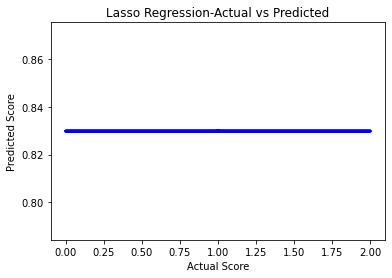


r2 Score On Train Data: 0.0

r2 Score On Test Data: -3.450969260820891e-05


Mean Absolute Error: 0.4550235748222103

Mean Squared Error: 0.3487582619377204

Root Mean Squared Error: 0.5905575856237226

Explained Variance Score: 0.0

Cross Validation
Lasso Regression Score: [-0. -0. -0. -0.  0.]
Average Lasso Regression score: -0.0007


In [357]:
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))


scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',scores)
print('Average Lasso Regression score:',round(scores.mean(),4))

In [358]:
alpha=[0.0001, 0.001, 0.01, 0.1, 1.009, 10.006, 2.00, 5000.09]
fit_intercept=[True,False]
normalize=[True,False]
precompute=[True,False]
copy_X=[True,False]
max_iter=[10, 50,5,90, 200, 110, 500, 1000]
positive=[True,False]
random_state=[1,5,10, 100,200,500]
selection=['cyclic','random']

param_distributions = dict(alpha=alpha,
                           fit_intercept=fit_intercept,
                           normalize=normalize,
                           precompute=precompute,
                           copy_X=copy_X,
                           max_iter=max_iter,
                           positive=positive,
                           random_state=random_state,
                           selection=selection)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9985641217244469
Best Params:  {'selection': 'random', 'random_state': 1, 'precompute': False, 'positive': False, 'normalize': False, 'max_iter': 500, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.0001}


#### MOdel Building using LassoCV

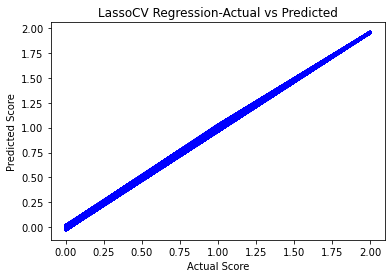


r2 Score On Train Data: 0.9985598524797531

r2 Score On Test Data: 0.9989071950724548


Mean Absolute Error: 0.01509836706993444

Mean Squared Error: 0.0003811115951236412

Root Mean Squared Error: 0.01952207968234023

Explained Variance Score: 0.9990560144932444

Cross Validation
LassoCV Regression Score: [1. 1. 1. 1. 1.]
Average LassoCV Regression score: 0.9999


In [359]:
regressor = LassoCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('LassoCV Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('LassoCV Regression Score:',scores)
print('Average LassoCV Regression score:',round(scores.mean(),4))


In [360]:
#alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]
max_iter = [2,5,10]
eps=[.0001,.01]
cv=[2,5,7]
positive=[True,False]
n_jobs=[1,3,5,9,10]

param_distributions = dict(eps=eps,
                           max_iter=max_iter,
                           cv=cv,
                           n_jobs=n_jobs,
                           positive=positive)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            n_jobs=-1,verbose=1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:  0.9983041000536895
Best Params:  {'positive': False, 'n_jobs': 3, 'max_iter': 10, 'eps': 0.01, 'cv': 7}


#### MOdel Building using Ridge

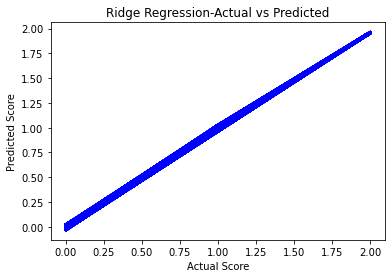


r2 Score On Train Data: 0.9985658221142248

r2 Score On Test Data: 0.9988844364597227


Mean Absolute Error: 0.015731785275566474

Mean Squared Error: 0.00038904857544146566

Root Mean Squared Error: 0.019724314321199244

Explained Variance Score: 0.9990336882752088

Cross Validation
Ridge Regression Score: [1. 1. 1. 1. 1.]
Average Ridge Regression score: 1.0


In [361]:
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Ridge Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Ridge Regression Score:',scores)
print('Average Ridge Regression score:',round(scores.mean(),4))


In [362]:
alpha=[1.2,2.3]
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
max_iter=[10, 50,5,90, 200, 110, 500, 1000]
solver=['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
random_state=[1,5,10, 100,200,500]

param_distributions = dict(alpha=alpha,
                           fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           max_iter=max_iter,
                           solver=solver,
                           random_state=random_state)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9985572808321501
Best Params:  {'solver': 'saga', 'random_state': 100, 'normalize': False, 'max_iter': 110, 'fit_intercept': True, 'copy_X': True, 'alpha': 1.2}


#### MOdel BUilding using Random Forest

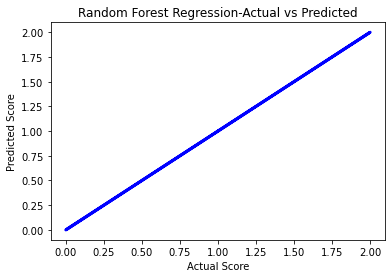


r2 Score On Train Data: 1.0

r2 Score On Test Data: 1.0


Mean Absolute Error: 0.0

Mean Squared Error: 0.0

Root Mean Squared Error: 0.0

Explained Variance Score: 1.0

Cross Validation
Random Forest Regression Score: [1. 1. 1. 1. 1.]
Average Random Forest Regression score: 1.0


In [363]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Random Forest Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',scores)
print('Average Random Forest Regression score:',round(scores.mean(),4))


In [364]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[1.4,3,2.6,9.3,1.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score:  -0.00033540084454739547
Best Params:  {'verbose': 1, 'random_state': 1, 'n_jobs': 1, 'n_estimators': 200, 'min_weight_fraction_leaf': 0.5, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_depth': 2, 'criterion': 'mse'}


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


#### Model Building using Decision Tree

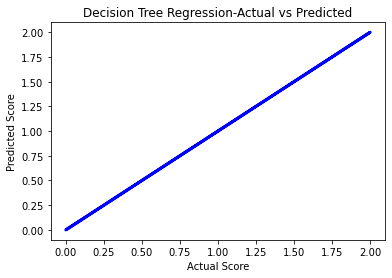


r2 Score On Train Data: 1.0

r2 Score On Test Data: 1.0


Mean Absolute Error: 0.0

Mean Squared Error: 0.0

Root Mean Squared Error: 0.0

Explained Variance Score: 1.0

Cross Validation
Decision Tree Regression Score: [1. 1. 1. 1. 1.]
Average Decision Tree Regression score: 1.0


In [365]:
regressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',scores)
print('Average Decision Tree Regression score:',round(scores.mean(),4))


In [366]:
criterion = ['mse','friedman_mse','mae','poisson']
splitter=['best','random']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_samples_leaf=[1,0.5]
min_weight_fraction_leaf=[0.45,0.46,0.0001,0.03,0.005,0.5]
max_features=['auto','sqrt','log2']
ccp_alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_leaf_nodes=[4,6,12,10,25,50]



param_distributions = dict(criterion = criterion,
                           splitter=splitter,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           ccp_alpha=ccp_alpha,
                           max_leaf_nodes=max_leaf_nodes)                      

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  1.0
Best Params:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.03, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 25, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'friedman_mse', 'ccp_alpha': 0.001}


#### Model building using Adaboost

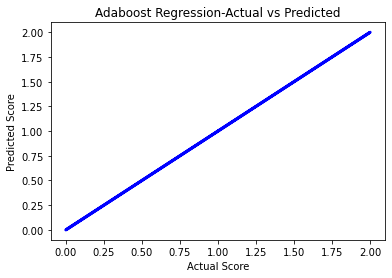


r2 Score On Train Data: 1.0

r2 Score On Test Data: 1.0


Mean Absolute Error: 0.0

Mean Squared Error: 0.0

Root Mean Squared Error: 0.0

Explained Variance Score: 1.0

Cross Validation
Adaboost Regression Score: [1. 1. 1. 1. 1.]
Average Adaboost Regression score: 1.0


In [367]:
DTR=DecisionTreeRegressor(max_depth=10)
regressor =  AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Adaboost Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))


scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Adaboost Regression Score:',scores)
print('Average Adaboost Regression score:',round(scores.mean(),4))

In [368]:
n_estimators=[2,4,6,8,10,12]
learning_rate=[1.5,3.4,5.6,9.2,10.2]
random_state=[1,5,10, 100,200,500]
loss=['linear','square','exponential']

param_distributions = dict(n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           random_state=random_state,
                           loss=loss)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Score:  1.0
Best Params:  {'random_state': 1, 'n_estimators': 2, 'loss': 'linear', 'learning_rate': 1.5}


#### Model BUilding using GradientBoosting

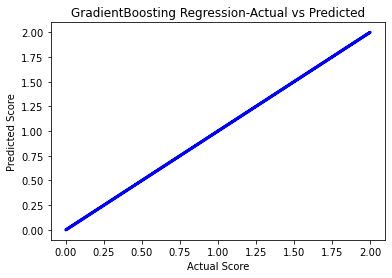


r2 Score On Train Data: 0.9999999992944921

r2 Score On Test Data: 0.9999999992944677


Mean Absolute Error: 1.208606267413895e-05

Mean Squared Error: 2.460517127776519e-10

Root Mean Squared Error: 1.5686035597870224e-05

Explained Variance Score: 0.9999999992944921

Cross Validation
Gradient Boosting Regression Score: [1. 1. 1. 1. 1.]
Average Gradient Boosting Regression score: 1.0


In [369]:
regressor = GradientBoostingRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('GradientBoosting Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('Gradient Boosting Regression Score:',scores)
print('Average Gradient Boosting Regression score:',round(scores.mean(),4))


In [370]:
loss=['ls','lad','huber','quantile']
learning_rate=[.001,.04,.05,0.6,1,1.2,0.5]
n_estimators=[23,45,60,69,98]
subsample=[0,1]
criterion=['friedman_mse','mse','mae']
min_samples_split=[3,5,1.5,0.4]
min_samples_leaf=[1,5,3,1.5,3.9,10,15]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
random_state=[1,5,10, 100,200,500]
max_features=['auto','sqrt','log2']
verbose = [1,5,4,10,30,15,20,100]

param_distributions = dict(loss=loss,
                           learning_rate=learning_rate,
                           n_estimators=n_estimators,
                           subsample=subsample,
                           criterion=criterion,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           random_state=random_state,
                           max_features=max_features,
                           verbose = verbose)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
      Iter       Train Loss   Remaining Time 
         1           0.1848           23.15s
         2           0.1824           21.72s
         3           0.1818           20.94s
         4           0.1817           20.28s
         5           0.1816           19.70s
         6           0.1816           19.25s
         7           0.1816           18.70s
         8           0.1816           18.23s
         9           0.1816           17.70s
        10           0.1816           17.24s
        11           0.1816           16.68s
        12           0.1816           16.21s
        13           0.1816           15.74s
        14           0.1816           15.23s
        15           0.1816           14.74s
        16           0.1816           14.24s
        17           0.1816           13.74s
        18           0.1816           13.26s
        19           0.1816           12.76s
        20           0.1816       

#### Model BUilding using XGB (Extreme Gradient Boosting)

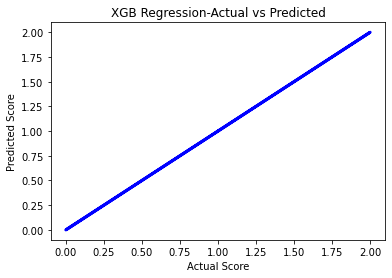


r2 Score On Train Data: 0.9999999995445901

r2 Score On Test Data: 0.9999999995443802


Mean Absolute Error: 9.751399943191638e-06

Mean Squared Error: 1.5889567079849028e-10

Root Mean Squared Error: 1.2605382612141936e-05

Explained Variance Score: 0.9999999995443946

Cross Validation
XGB Regression Score: [1. 1. 1. 1. 1.]
Average XGB Regression score: 1.0


In [371]:
regressor = XGBRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.plot(y_test, y_pred, color='blue',linewidth=3)
#plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('XGB Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df_train, y, cv=5)
print('\nCross Validation')
print('XGB Regression Score:',scores)
print('Average XGB Regression score:',round(scores.mean(),4))

In [372]:
colsample_bytree=[0.1, 1.1, 0.1]
#np.linspace(0.5, 0.9, 5)
n_estimators=[100, 200]
max_depth=[10, 15, 20, 25]
eta=[0.0001, 0.001, 0.01, 0.1, 1.0]
subsample=[0.1, 1.1, 0.1]

param_distributions = dict(colsample_bytree=colsample_bytree,
                           n_estimators=n_estimators,
                           max_depth=max_depth,
                           eta=eta,
                           subsample=subsample)

random = RandomizedSearchCV(estimator=regressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Score:  0.9999931440700582
Best Params:  {'subsample': 0.1, 'n_estimators': 200, 'max_depth': 25, 'eta': 0.0001, 'colsample_bytree': 0.1}


### AdaBoost as the final model 

#### Full data set and # Separate Target Variable and Predictor Variables

In [377]:
PScaler=MinMaxScaler()
PScalerFit=PScaler.fit(df_train)

X=PScalerFit.transform(df_train)

print(X.shape)
print(y.shape)

(8523, 11)
(8523,)


#### Retraining the Model 

In [379]:
regressor = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=1.5,random_state=10,loss='square')
Final_Model=regressor.fit(X,y)

# Calculating R2 Score
r2_score =regressor.score(X, y)
print('Final Score:',r2_score)


Final Score: 1.0


#### Model Saving

In [380]:
import pickle
filename='BigMartSale.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
